# Рынок заведений общественного питания Москвы


Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Партнёры просят подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

Описание данных

Таблица rest_data:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.


## Изучение данных

Составим первое представление о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('rest_data.csv')
display(data.head())
display(data.info())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

Итак, в таблице 6 столбцов, количество значений в столбцах одинаковое, значит пропусков нет. Типы данных int и object.

Посмотрим наличие явных и неявнях дубликатов

In [3]:
dupl = len(data[data[['object_name', 'address', 'object_type']].duplicated() == True][['object_name', 'address']])
print('Количество явных дубликатов:', data.duplicated().sum())
print('Количество неявных дубликатов:', dupl)

Количество явных дубликатов: 0
Количество неявных дубликатов: 171


Количество неявных дубликатов составляет 1% от общего числа. Принимает решение их оставить т.к на результаты они не повлияют.

## Cоотношение видов объектов общественного питания по количеству.

Исследуем соотношение видов общественного питания по их количеству. Для этого сгруппируем данные по object_type и посчитаем их количество. Для наглядности построим график.

,Тип объекта,Количество,"Доля от общего числа,%"
0,кафе,6099,39.7
1,столовая,2587,16.8
2,ресторан,2285,14.9
3,предприятие быстрого обслуживания,1923,12.5
4,бар,856,5.6
5,буфет,585,3.8
6,кафетерий,398,2.6
7,закусочная,360,2.3
8,магазин (отдел кулинарии),273,1.8


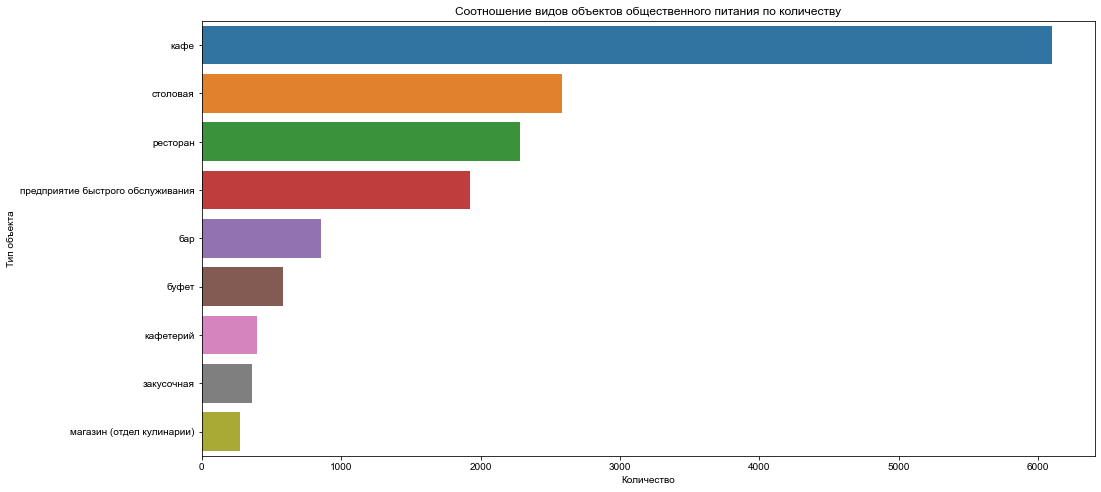

In [4]:
data_type = data.groupby(by='object_type').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()

data_type.columns = ['Тип объекта','Количество']
data_type['Доля от общего числа,%'] = (data_type['Количество'] /data_type['Количество'].sum() * 100).round(1)
display(data_type.sort_values(by='Количество',ascending=False))

plt.figure(figsize=(16, 8))
sns.barplot(data=data_type,x='Количество', y='Тип объекта')
sns.set_style("darkgrid")

plt.title('Cоотношение видов объектов общественного питания по количеству');

Судя по графику наибольшую долю рынка общественного питания в Москве занимают:
* кафе(39,7%);
* столовые(16,8%);
* рестораны(14,9%);
* предприятия быстрого обслуживания(12,5%). 

Остальные виды объектов общественного питания в сумме занимают 16,1%.

## Соотношение сетевых и несетевых заведений по количеству

Исследуем соотношение сетевых и несетевых заведений по их количеству. сгрупируем данные по chain и посчитаем их количество. Для наглядности построим график.

,Сетевой ресторан,Количество,"Доля от общего числа,%"
0,нет,12398,80.7
1,да,2968,19.3


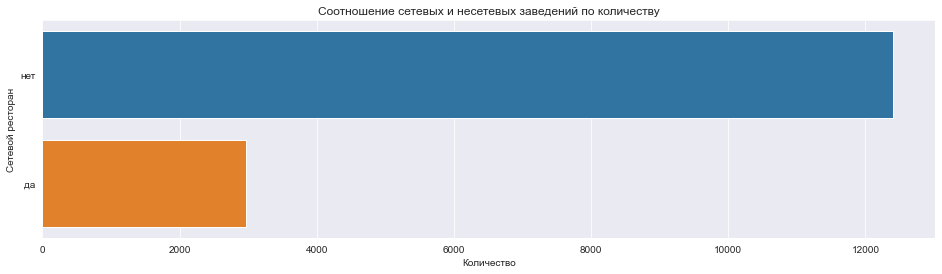

In [5]:
data_chain = data.groupby(by='chain').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()

data_chain.columns = ['Сетевой ресторан','Количество']
data_chain['Доля от общего числа,%'] = (data_chain['Количество'] /data_chain['Количество'].sum() * 100).round(1)
display(data_chain)

plt.figure(figsize=(16, 4))
sns.barplot(data=data_chain,x='Количество', y='Сетевой ресторан')
sns.set_style("darkgrid")

plt.title('Соотношение сетевых и несетевых заведений по количеству');

Количество несетевых объектов общественного питания составляет 80,7% от общей массы. В 4 раза выше, чем сетевых(19,3%)

## Для какого вида объекта общественного питания характерно сетевое распространение

Создадим сводную таблицу и посмотрим процент сетевых заведений в каждом типе. Для наглядности построим график.

In [6]:
chain_true = data.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').reset_index()
chain_true['Доля сетевых объектов %'] = ((chain_true['да'] / (chain_true['да'] + chain_true['нет'])) * 100).round(1)
chain_true = chain_true.sort_values('Доля сетевых объектов %', ascending = False)
chain_true.columns = ['Вид объекта', 'Сетевой', 'Несетевой', 'Доля сетевых объектов']
display(chain_true)

,Вид объекта,Сетевой,Несетевой,Доля сетевых объектов
6,предприятие быстрого обслуживания,791,1132,41.1
5,магазин (отдел кулинарии),78,195,28.6
7,ресторан,544,1741,23.8
3,кафе,1396,4703,22.9
2,закусочная,56,304,15.6
4,кафетерий,52,346,13.1
0,бар,37,819,4.3
1,буфет,11,574,1.9
8,столовая,3,2584,0.1


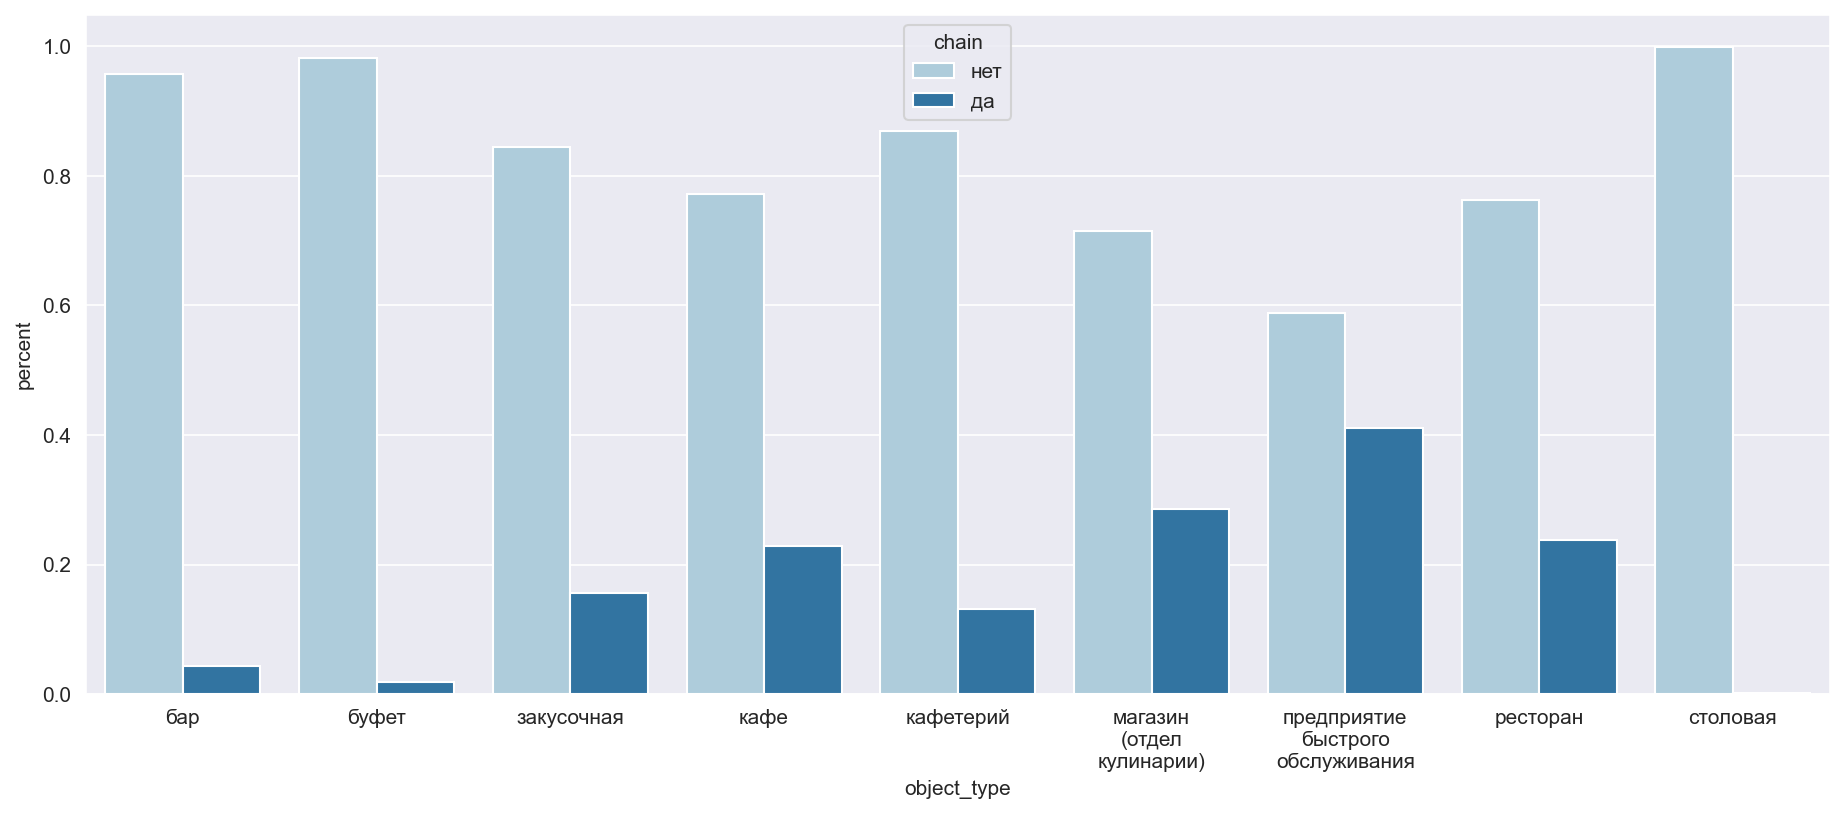

In [7]:
plt.figure(figsize=(15,6), dpi=150)

data.groupby('object_type')['chain'].value_counts(normalize=True) \
    .rename('percent') \
    .reset_index() \
    .pipe((sns.barplot, 'data'), x='object_type', y='percent', hue='chain', palette=sns.color_palette('Paired'))

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels]);

Сетевое распространение характерно для:
* предприятий быстрого обслуживания(41,1%);
* магазин (отдел кулинарии)(28,6%);
* рестораны(23,8%).

## Что характерно для сетевых заведений

Посмотрим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [8]:
chain_number = data.query('chain=="да"').groupby('object_name').agg({'id':'count','number':'mean'}).reset_index().round(1)
chain_number = chain_number.query('id !=1')
chain_number

,object_name,id,number
3,Bocconcino,3,66.7
6,Burger Club,3,20.3
7,COFIX,3,10.7
10,Coffeeshop Company,4,47.2
11,Cofix,22,9.5
...,...,...,...
702,Шоколадница,141,56.2
706,Штолле,12,31.4
708,ЯКИТОРИЯ,5,185.6
712,Якитория,33,106.8


Определим какое число заведений в сети можно считать большим, а какое небольшим и то же самое сделать для числа посадочных мест, ориентируясь по квантилям.

In [9]:
var_c_33 = chain_number['id'].quantile(0.33)
var_c_66 = chain_number['id'].quantile(0.66)
var_s_33 = chain_number['number'].quantile(0.33)
var_s_66 = chain_number['number'].quantile(0.66)

pd.concat([pd.cut(chain_number['id'], bins=[1,var_c_33,var_c_66,np.inf], labels=['мало заведений', 'средне заведений', 'много заведений']),
        pd.cut(chain_number['number'], bins=[0,var_s_33,var_s_66,np.inf], labels=['мало мест', 'средне мест', 'много мест'], include_lowest=True)], axis=1).value_counts().to_frame().unstack('id')

0                                 
id          мало заведений средне заведений много заведений
number                                                     
мало мест               37               27              27
средне мест             28               29              33
много мест              34               33              26

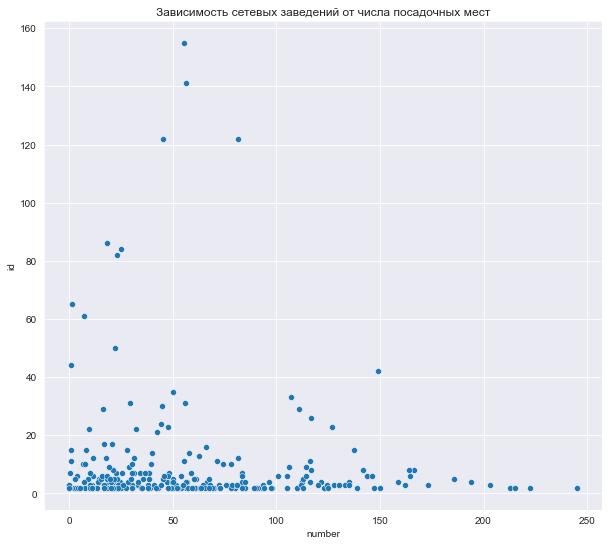

In [11]:
plt.figure(figsize=(10, 9))
sns.scatterplot(data=chain_number, x="number", y="id")
plt.title('Зависимость сетевых заведений от числа посадочных мест');

По графику видно, что у большей части сетевых заведений характерно мало заведений с небольшим числом посадочных мест.

## Среднее количество посадочных мест для каждого вида объекта общественного питания

,Тип объекта,Среднее число посадочных мест
5,магазин (отдел кулинарии),5.6
2,закусочная,7.6
4,кафетерий,9.1
6,предприятие быстрого обслуживания,20.6
3,кафе,39.7
0,бар,43.5
1,буфет,51.1
7,ресторан,96.8
8,столовая,130.2


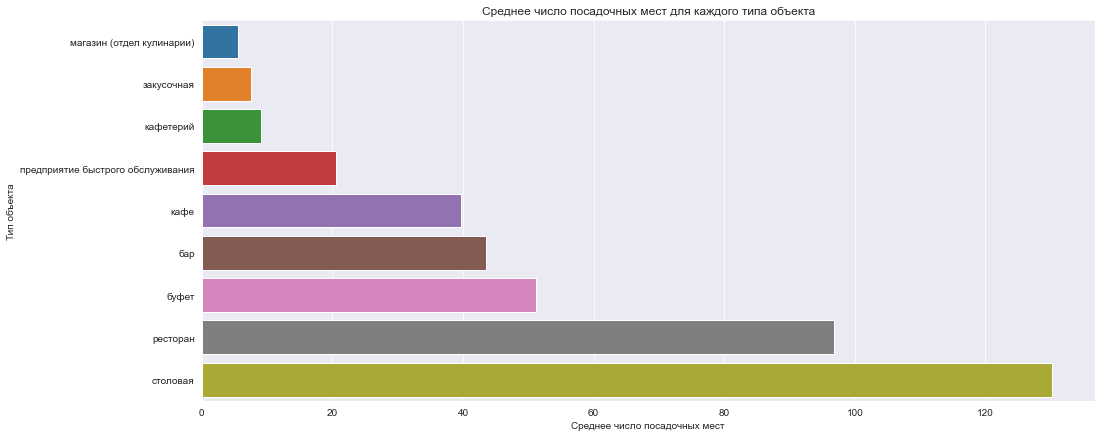

In [12]:
type_number = data.groupby('object_type').agg({'number':'mean'}).reset_index().round(1)
type_number.columns = ['Тип объекта','Среднее число посадочных мест']
type_number = type_number.sort_values(by='Среднее число посадочных мест')
display(type_number)

plt.figure(figsize=(16, 7))
sns.barplot(data=type_number,x='Среднее число посадочных мест', y='Тип объекта')
sns.set_style("darkgrid")

plt.title('Среднее число посадочных мест для каждого типа объекта');

* В среднем наибольшее количество посадочных мест характерно для столовых(130) и ресторанов(96) 
* Меньше всего посадочных мест в магазинах (отделах кулинарии), закусочных и кафетериях (менее 10 посадочных.)

## Создание отдельного столбца с информацией об улице из столбца address 

Выделим столбец с улицей

In [13]:
data['street'] = data['address'].str.split(',', expand=True)[1]
data.sample(5)

,id,object_name,chain,object_type,address,number,street
11314,175569,KFC,да,кафе,"город Москва, Севастопольский проспект, дом 11Е",20,Севастопольский проспект
10127,172551,Ресторан Le restaurant,нет,ресторан,"город Москва, 2-я Звенигородская улица, дом 13...",86,2-я Звенигородская улица
15119,219044,Крошка Картошка,да,кафе,"город Москва, улица Вавилова, дом 3",0,улица Вавилова
3858,22647,ТД ГУМ Кафе 2 Гастроном 1,нет,кафе,"город Москва, Красная площадь, дом 3",25,Красная площадь
9699,169146,БИРЕТТА,нет,кафе,"город Москва, Сущёвская улица, дом 19, строение 4",15,Сущёвская улица


Можно увидеть, что в столбец street попали города/поселения/и т.п.. От этого избавимся с помощью str. contains.

In [15]:
data = data[data['street'].str.contains('город|поселение|территория') == False]
data.sample(5)

,id,object_name,chain,object_type,address,number,street
12557,198920,Бар Great Room,нет,бар,"город Москва, Левобережная улица, дом 12",102,Левобережная улица
9254,166444,Эко-пекарня Президент,нет,кафетерий,"город Москва, Новолесная улица, дом 18, корпус 2",3,Новолесная улица
8100,147988,KFC,да,предприятие быстрого обслуживания,"город Москва, Комсомольская площадь, дом 2",52,Комсомольская площадь
9084,162641,КАФЕ,нет,кафе,"город Москва, Сельскохозяйственная улица, дом ...",40,Сельскохозяйственная улица
13480,194880,Чайхона №1,да,ресторан,"город Москва, улица Маршала Катукова, дом 23",150,улица Маршала Катукова


Таким образом, успешно выделили столбец с названием улицы.

## Топ-10 улиц по количеству объектов общественного питания. 

,street,id
1422,проспект Мира,204
986,Профсоюзная улица,182
679,Ленинградский проспект,171
972,Пресненская набережная,167
406,Варшавское шоссе,161
682,Ленинский проспект,147
1419,проспект Вернадского,132
670,Кутузовский проспект,114
597,Каширское шоссе,112
602,Кировоградская улица,110


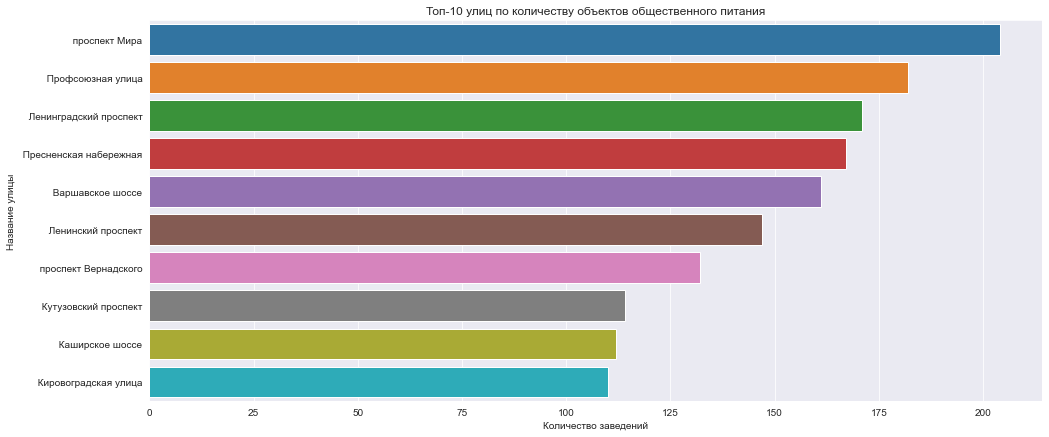

In [16]:
top_10 = data.groupby('street').agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False).head(10)
#top_10.columns = ['Название улицы','Количество заведений']
display(top_10)

plt.figure(figsize=(16, 7))
sns.barplot(data=top_10,x='id', y='street')
sns.set_style("darkgrid")
plt.ylabel('Название улицы')
plt.xlabel('Количество заведений')
plt.title('Топ-10 улиц по количеству объектов общественного питания');

Импортируем таблицу с заведениями и названиями районов и округов из Портала открытых данных.

In [17]:
from io import BytesIO
import requests
spreadsheet_id = '1voOLKixVHWmW3wtWXShQpgYk0r9Di5TAWZ4vU2ZRmiA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head(5)

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN


Объединим две таблицы, чтобы узнать названия округов и районов для наших улиц.

In [18]:
df.columns = df.columns.str.lower()
rest_data = data.merge(df[['district', 'admarea', 'address']], on='address', how='left')
rest_data = rest_data.dropna().drop_duplicates()
rest_data.head()

,id,object_name,chain,object_type,address,number,street,district,admarea
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район,Северо-Восточный административный округ
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район,Центральный административный округ
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово,Северо-Восточный административный округ
7,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек,район Арбат,Центральный административный округ
8,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица,район Лефортово,Юго-Восточный административный округ


Теперь посмотрм названия районов и округов для нашего Топ-10.

In [24]:
rest_data[rest_data['street'].isin(top_10['street'])].groupby(['street','district']).agg({'id' : 'count'})

id
street                  district                            
 Варшавское шоссе       Донской район                     31
                        Нагорный район                    25
                        район Нагатино-Садовники           4
                        район Чертаново Северное          19
                        район Чертаново Центральное        8
                        район Чертаново Южное             35
                        район Южное Бутово                 2
 Каширское шоссе        район Москворечье-Сабурово        29
                        район Нагатино-Садовники          20
                        район Орехово-Борисово Северное   10
                        район Орехово-Борисово Южное       4
 Кировоградская улица   район Чертаново Северное          19
                        район Чертаново Центральное       78
                        район Чертаново Южное              7
 Кутузовский проспект   поселение Краснопахорское         40
                        район Дорогомилово                39
                        район Фили-Давыдково              63
 Ленинградский проспект Хорошёвский район                 12
                        район Аэропорт                    62
                        район Беговой                     46
                        район Сокол                       20
 Ленинский проспект     Гагаринский район                 31
                        Донской район                     10
                        Ломоносовский район               10
                        Обручевский район                 30
                        район Проспект Вернадского         1
                        район Тропарёво-Никулино          20
                        район Тёплый Стан                  3
                        район Якиманка                    12
 Пресненская набережная Пресненский район                135
 Профсоюзная улица      Обручевский район                 30
                        район Коньково                    29
                        район Тёплый Стан                 36
                        район Черёмушки                   35
                        район Ясенево                     14
 проспект Вернадского   Ломоносовский район               13
                        поселение Вороновское              1
                        район Проспект Вернадского        11
                        район Раменки                     32
                        район Тропарёво-Никулино          47
 проспект Мира          Алексеевский район                43
                        Мещанский район                   53
                        Останкинский район                12
                        район Ростокино                    6
                        район Свиблово                    62

* Наибольшее количество объектов питания располагается на Проспекте Мира, здесь 204 объектов общественного питания;
* Каждая улица в топ-10 включает в себя более 100 заведений;
* Улицы в списке топ-10 проходят через 35 районов Москвы.

## Улицы с одним объектом общественного питания

Посмотрм сколько всего улиц с одним объектом общественного питания:

In [21]:
one_type = data.groupby('street').agg({'id':'count'}).reset_index().sort_values(by='id').query('id==1')
print('Число улиц с одним объектом общественного питания:', one_type['id'].count())

Число улиц с одним объектом общественного питания: 577


Теперь посмотрим в каких районах они находятся. Для этого возьмем данные уже из готовой таблицы data_dis

In [22]:
on_type_dis = one_type.merge(data_dis, how='left', on='street').pivot_table(index=['street', 'district','admarea'])
display(on_type_dis.head())
#pd.set_option('display.max_rows', None)
print(on_type_dis.value_counts('district'))

,,,id
street,district,admarea,
1-й Балтийский переулок,район Аэропорт,Северный административный округ,1
1-й Басманный переулок,Красносельский район,Центральный административный округ,1
1-й Ботанический проезд,район Свиблово,Северо-Восточный административный округ,1
1-й Голутвинский переулок,район Якиманка,Центральный административный округ,1
1-й Котельнический переулок,Таганский район,Центральный административный округ,1


district
Таганский район               19
Басманный район               16
Тверской район                15
район Хамовники               15
район Сокольники              10
                              ..
район Москворечье-Сабурово     1
район Нагатино-Садовники       1
район Некрасовка               1
район Очаково-Матвеевское      1
район Капотня                  1
Length: 92, dtype: int64


* Количество улиц с одним объектом общественного питания - 577
* Количество районов через которые проходят эти улицы - 92

## Вывод

Был проведен анализ рынка заведений общественного питания в Москве. На основании данного анализа можно сделать такие выводы:
* Наибльшую долю рынка общественного питания в Москве занимают кафе(39,7%), столовые(16,8%), рестораны(14,9%) и предприятия быстрого обслуживания(12,5%). Остальные виды объектов общественного питания в сумме занимают 16,1%;
* Наиболее распространены несетевые объекты. Их количество составляет 80,7% от общей массы. Это в 4 раза выше, чем сетевых(19,3%);
* Сетевое распространение характерно для: предприятий быстрого обслуживания(41,1%), магазинов (отдел кулинарии)(28,6%) и ресторанов(23,8%);
* Для сетевых заведений характерно мало заведений с небольшим числом посадочных мест;
* В среднем наибольшее количество посадочных мест характерно для столовых(130) и ресторанов(96). Меньше всего посадочных мест в магазинах (отделах кулинарии), закусочных и кафетериях (менее 10);
* Выявлен топ-!0 улиц по количеству объектов общественного питания. Наибольшее количество располагается на Проспекте Мира, здесь 204 объектов общественного питания. Каждая улица в топ-10 включает в себя более 100 заведений и эти улицы проходят через 35 районов Москвы;
* Количество улиц с одним объектом общественного питания - 577. Также можно посмотреть в каких районах и округах располагаются эти улицы.

На основании анализа могу дать рекомендации для партнеров:
* Так как наибольшую долю ранка составляют кафе(почти 40%), можно сделать вывод о популярности данного типо заденения в Москве. Плюс такой тип хорошо подойдет под формат описанный в ТЗ. Небольшое кафе с роботами-официантами;
* Судя по анализу для кафе характерно среднее количество посадочных мест 40 шт. Можно рассматрвать интервал посадки в 30-50 посадочных мест;
* Район расположеия так же очень важен. Я бы рекомендовала рассмотреть улицы в списке Топ-10, неспроста на этих улицах большое количество заведений. Большая проходимость людей один из главных факторов. Следует также рассмотреть помещения в близкой доступтости от метро, наличия бизнес центров, университетов, отелей в данных районах. В Москве большое количество туристов, их также может заинтересовать необычная концепция. 

Презентация: https://disk.yandex.ru/i/_Ne3TTcy55oNIw